# Building an Image Classifier Using the Sequential API

In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as np
import numpy as np

<h7>About data set </h7>
<p>Loads the Fashion-MNIST dataset.This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.</p>

In [52]:
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [53]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [54]:
X_train_full.shape

(60000, 28, 28)

In [55]:
X_test.shape

(10000, 28, 28)

In [56]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

The dataset is split into a training set and test set ,but there is no validation set so we'll create one now &scale the input seature  for simplicity 

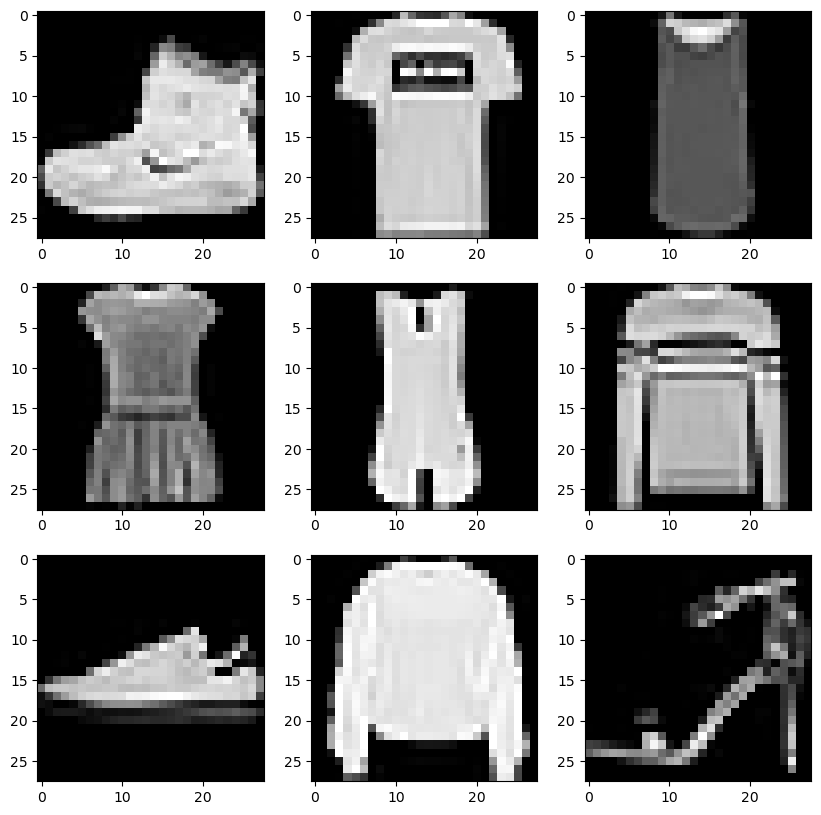

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [58]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [59]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

For fashion MINST,however, we need the list of class names to know what we are dealing with 

In [61]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [62]:
class_names[y_train[8]]

'Dress'

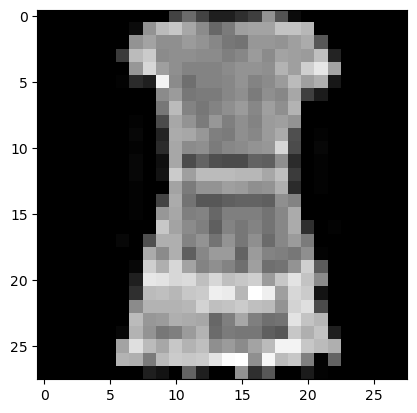

In [63]:
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#Sigmoid: probabilities produced by a Sigmoid are independent.
#Softmax: the outputs are interrelated. The sum of all outputs are 1.

Let's go to explain this model:
<ol>
<li>The first line creates a Sequential model .this is the simplest kind of Keras model for NN that are just composed of a single stack of layers connected sequentially(Sequential API)</li>
  <li>Next ,First layer(input layer).it's a Flatten layer whose role is to convert each input image into a 1D array </li>
  <li>Next, adding Dense hidden layer with 300 neurons.it will use Relu activation function </li>
  <li>Next, adding Dense hidden layer with 100 neurons.it will use Relu activation function </li>
  <li>Finally, adding dense output layer with 10 neurons(one per class ),using the  softmax activation function(because the classes are exclusive) </li>
</ol>  
<b>Note:<b>
<p>Specifying activation ="relu" is equivalent to specifying activation=keras.activations.relu</p> 

In [65]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

<p>You must call its compile() method to specify the loss function & optimizer to use</p>
<p>Some explanation .first we use  the "spare_categorical_crosstropy" loss because  we have sparse lable(for each instance ,there is just a target class index from 0-9 in this cass )</p>  
<p>Regarding the optimizer "sgd" means that we will train the model using simple Stochastic Gradint Desent & when using SGD optimizer it is important to tune the learning rate  .which defaluts to le=0.01</p>

In [66]:
X_train.shape

(55000, 28, 28)

In [67]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid)) # also possible to use validation_split=0.1

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7123 - accuracy: 0.7633 - val_loss: 0.5850 - val_accuracy: 0.7874
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4913 - accuracy: 0.8279 - val_loss: 0.4436 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4460 - accuracy: 0.8429 - val_loss: 0.4236 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4196 - accuracy: 0.8533 - val_loss: 0.4075 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3989 - accuracy: 0.8594 - val_loss: 0.4152 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8648 - val_loss: 0.3678 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8696 - val_loss: 0.3802 - val_accuracy:

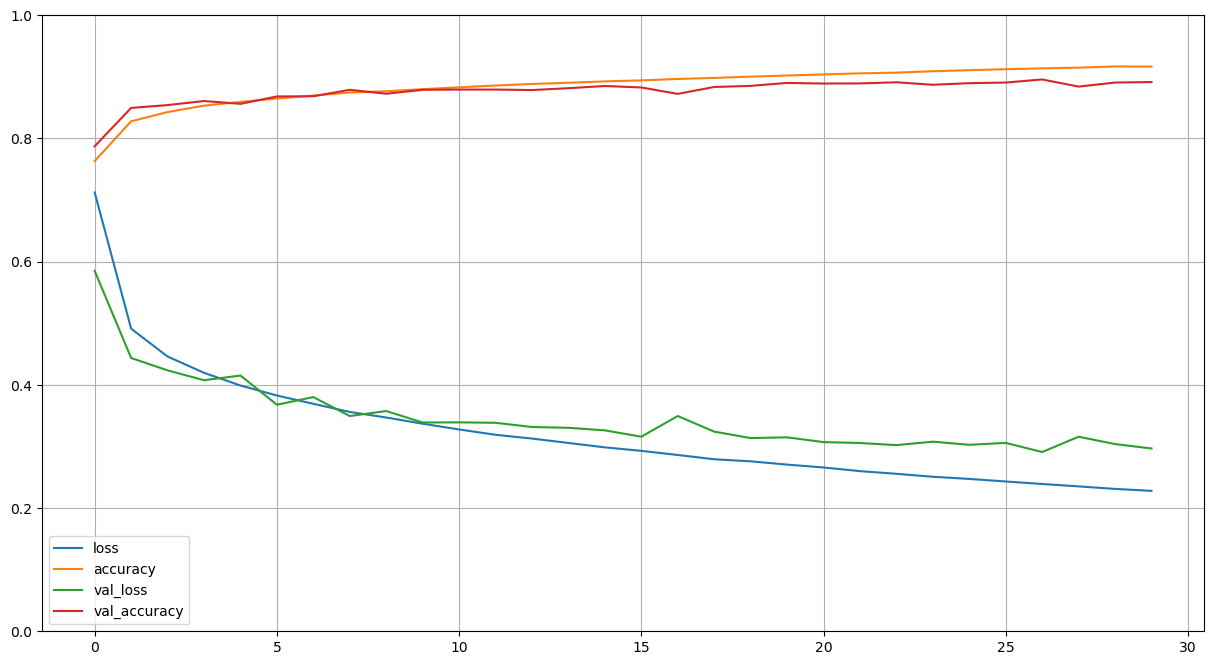

In [68]:

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [105]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8842


[0.3262784481048584, 0.8841999769210815]

In [80]:
x_new=X_test[:3]
y_prob=model.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 15ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [78]:
y_pred=model.predict(x_new)
y_pred=y_pred.argmax(axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 15ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

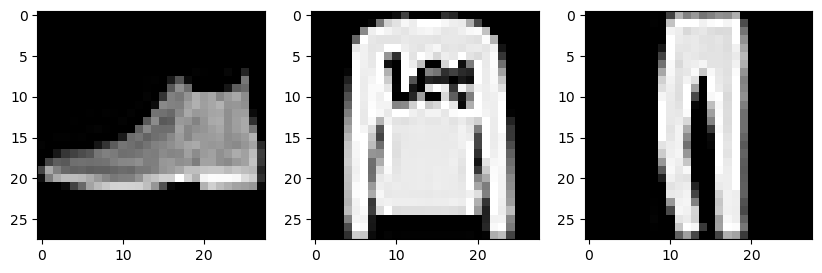

In [97]:
# Real Data
fig, axes = plt.subplots(1,3, figsize=(10,10))
a = 0

for j in range(3):        
    axes[j].imshow(X_test[a], cmap=plt.get_cmap('gray'))
    a = a + 1

plt.show()
    

In [101]:
y_pred

array([9, 2, 1], dtype=int64)

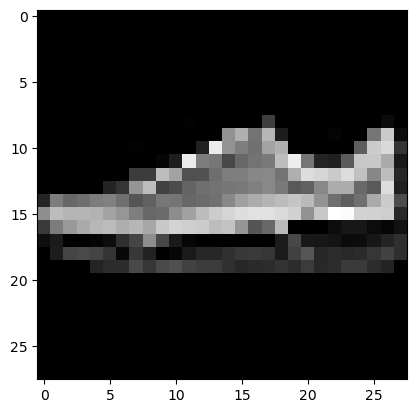

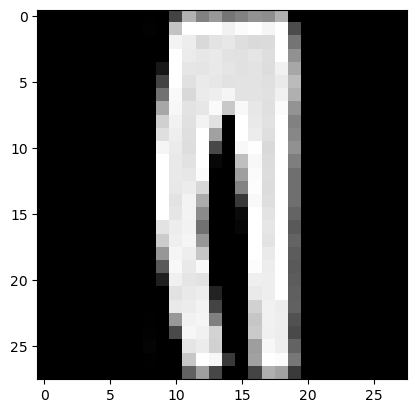

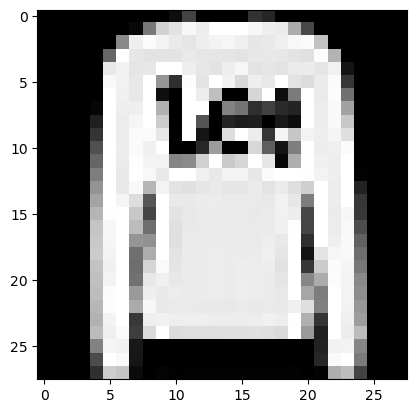

In [104]:
# predicted data


for i in y_pred:
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.show()

 Now you know how to use the Sequential API to bjild ,ttain,evaluate,and send a class sification MLP .